In [1]:
# Basic Visualization & Clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations


In [2]:
file = pd.read_csv("Relshare.csv")

In [3]:
def map_values(old_df, id_pairs):
    df = old_df
    for id_pair in id_pairs:
        unique_values = pd.concat([df[id_pair[0]],df[id_pair[1]]]).unique()
        value_to_int_map = {value: idx for idx, value in enumerate(unique_values)}
        for column in id_pair:
            if column not in df.columns:
                print(f'Errror: Column {column} does not exist.')
                return None
            df[column] = df[column].map(value_to_int_map)
    
        print("Mapping of unique values to integers:")
        for value, idx in value_to_int_map.items():
            print(f"{value} -> {idx}")

    return df
new_df = map_values(file, [["Age","age2"],["gender","gender2"],['ID1', 'ID2'],['ID3', 'ID4']])

Mapping of unique values to integers:
45-54 -> 0
35-44 -> 1
55-64 -> 2
18-24 -> 3
25-34 -> 4
-50 -> 5
Mapping of unique values to integers:
Female -> 0
Male -> 1
-50 -> 2
Mapping of unique values to integers:
5654a29404212700104a1d0e -> 0
6146f00304ffc2626b914d5e -> 1
5ee64d0bf796cb3b252a8c99 -> 2
5ea00a8a39c0f00008064b2b -> 3
5a972432873cda0001dc9321 -> 4
5dc7f4daa6eae358b81c34d9 -> 5
60d8d3832eca72602139cfdd -> 6
5bffc3ae4108380001f5cd63 -> 7
5e36965ded5a2b62bf438768 -> 8
5f0cb319d29147695796a208 -> 9
59400f1c6b84600001e76c13 -> 10
5e791235c7d30f00096255e0 -> 11
5af4579eb625f70001e0cfad -> 12
5eee87f13994e73429924805 -> 13
5def4e6e09c1075da1ee992b -> 14
5fc74b5900f0a5079e03dbae -> 15
5ed917ec0318c6466f50a0a6 -> 16
5c867a35b5bfcb00115af368 -> 17
5fcf61cae339e601668c71aa -> 18
62974bf0b641c08a1f88cfff -> 19
60919018ce223dc3906d7a7e -> 20
5b743152fd718d00013d2014 -> 21
5a9c1988f6dfdd0001ea9933 -> 22
60f984adfea10999e9a39727 -> 23
5e1de1181dcc4c144a683022 -> 24
5ee9e46e9087b300082d46cd -

In [4]:
nan_count = new_df.isna().sum()
print(nan_count)

Unnamed: 0               0
Age                      0
gender                   0
number                   0
ID1                      0
ID2                      0
satisfaction             0
partnerliking            0
mutuality                0
relationship length      0
commitment               0
honesty                  0
love of learning         0
partnerIT                0
partnerOC                0
selfIT                   0
extroversion             0
agreeableness            0
conscientiousness        0
stability                0
openness                 0
ID3                      0
ID4                      0
satisfaction2            0
partnerliking2           0
mutuality2               0
length2                  0
commitment2              0
honesty2                 0
love of learning2        0
partnerIT2               0
selfIT2                  0
extroversion2            0
agreeableness2           0
conscientiousness2       0
stability2               0
openness2                0
a

In [5]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(new_df, 3)
kmeans = pd.DataFrame(clust_labels)
new_df.insert((new_df.shape[1]),'kmeans',kmeans)

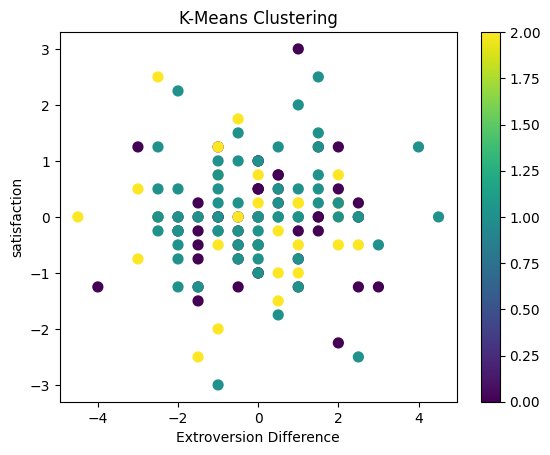

In [9]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(new_df['agreeablenessdiff'],new_df['satisfactiondiff'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Extroversion Difference')
ax.set_ylabel('satisfaction')
plt.colorbar(scatter)